<a href="https://colab.research.google.com/github/dudubouneto/Disc_FluxoVacinacao/blob/main/%C3%81rea_Territorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Discretização das variáveis/Data/Dados_IBGE_Faixas_de_Populacao_cpy.csv')
data = data[['Municipio', 'area']]
data.head()

,Municipio,area
0,ADAMANTINA,411.987
1,ADOLFO,211.055
2,AGUAÍ,474.554
3,ÁGUAS DA PRATA,142.673
4,ÁGUAS DE LINDÓIA,60.126


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Municipio  645 non-null    object
 1   area       645 non-null    object
dtypes: object(2)
memory usage: 10.2+ KB


In [ ]:
# retirando os pontos
data['area'] = data['area'].apply(lambda x: x.replace('.',''))

In [ ]:
data['area'] = data['area'].apply(lambda x: float(x)/1000)

In [ ]:
data.head()

,Municipio,area
0,ADAMANTINA,411.987
1,ADOLFO,211.055
2,AGUAÍ,474.554
3,ÁGUAS DA PRATA,142.673
4,ÁGUAS DE LINDÓIA,60.126


In [ ]:
# conferindo o tipo de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Municipio  645 non-null    object 
 1   area       645 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


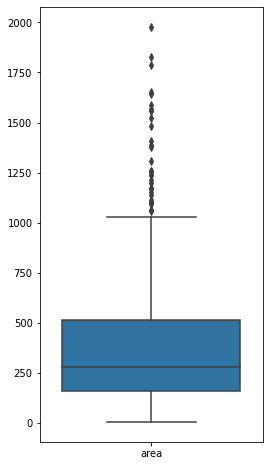

In [ ]:
plt.figure(figsize=(4,8))
sns.boxplot(data=data)

### Histograma 

In [ ]:
data.describe

<bound method NDFrame.describe of             Municipio     area
0          ADAMANTINA  411.987
1              ADOLFO  211.055
2               AGUAÍ  474.554
3      ÁGUAS DA PRATA  142.673
4    ÁGUAS DE LINDÓIA   60.126
..                ...      ...
640        VOTORANTIM  183.517
641       VOTUPORANGA  420.703
642          ZACARIAS  319.056
643         CHAVANTES  188.727
644      ESTIVA GERBI   74.144

[645 rows x 2 columns]>

In [ ]:
firstQuart = data.quantile(.25)[0]
thirdQuart = data.quantile(.75)[0]
superiorLim = thirdQuart + 1.5 * (thirdQuart - firstQuart)
bins = [0, 158.025, 281.033, 511.621, superiorLim, data['area'].max()]
labels = ["menor que 158.025", "158.026 a 281.033", "281.034 a 511.521", "511.522 a %.3f" % (superiorLim), "superior a %.3f" % (superiorLim)]
data['Classificacao_Area'] = pd.cut(data['area'], bins=bins, labels=labels)
data.head(15)

,Municipio,area,Classificacao_Area
0,ADAMANTINA,411.987,281.034 a 511.521
1,ADOLFO,211.055,158.026 a 281.033
2,AGUAÍ,474.554,281.034 a 511.521
3,ÁGUAS DA PRATA,142.673,menor que 158.025
4,ÁGUAS DE LINDÓIA,60.126,menor que 158.025
5,ÁGUAS DE SANTA BÁRBARA,404.463,281.034 a 511.521
6,ÁGUAS DE SÃO PEDRO,3.612,menor que 158.025
7,AGUDOS,966.708,511.522 a 1042.015
8,ALAMBARI,159.600,158.026 a 281.033
9,ALFREDO MARCONDES,118.915,menor que 158.025


In [ ]:
# verificando ordenação do atributo "Classificacao_area"
data['Classificacao_Area'].dtype

CategoricalDtype(categories=['menor que 158.025', '158.026 a 281.033',
                  '281.034 a 511.521', '511.522 a 1042.015',
                  'superior a 1042.015'],
, ordered=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Municipio           645 non-null    object  
 1   area                645 non-null    float64 
 2   Classificacao_Area  645 non-null    category
dtypes: category(1), float64(1), object(1)
memory usage: 11.0+ KB


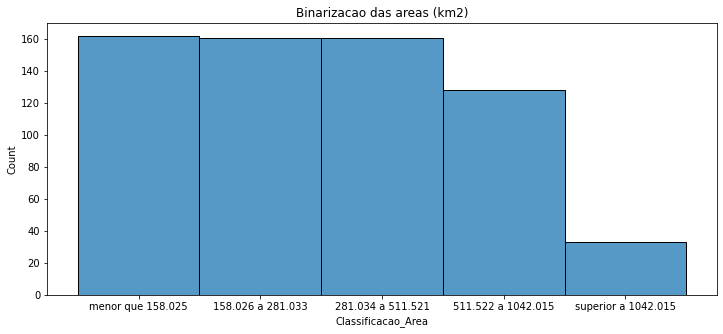

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Binarizacao das areas (km2)')
sns.histplot(data=data['Classificacao_Area'])